In [10]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
n_task_per_file = 50
n_files = 10
base_dir = "proportional/toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [12]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [13]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.05,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,1.000000,0.714286,1.000000,0.833333,0.833333,0.857143
1,1.000000,0.833333,0.666667,1.000000,0.833333,0.666667,0.833333
2,0.833333,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
3,1.000000,0.666667,0.833333,0.666667,1.000000,0.833333,0.666667
4,0.800000,1.000000,1.000000,1.000000,0.800000,0.600000,1.000000
...,...,...,...,...,...,...,...
28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143
29,0.833333,1.000000,0.833333,0.833333,0.666667,0.833333,1.000000
30,1.000000,1.000000,0.833333,0.857143,1.000000,1.000000,1.000000
31,0.833333,1.000000,0.833333,1.000000,0.833333,0.833333,0.833333


In [14]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.05,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,12.945542,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
1,20.480708,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
2,12.859651,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
3,12.363381,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
4,12.142667,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
...,...,...,...,...,...,...,...
28,13.154400,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
29,16.406790,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
30,11.789776,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
31,12.837481,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588


In [15]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [16]:
MSE_df.mean()

1.0        4.735551
UV_0.05    4.721951
UV_0.1     4.770263
UV_0.2     4.799674
UV_0.3     4.877184
UV_0.4     4.890440
UV_0.5     4.979887
dtype: float64

In [17]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_17366/1017322165.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_17366/1017322165.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_17366/1017322165.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)


Coverage :
 RRT(1)      0.897481
UV(0.05)    0.901129
UV(0.1)     0.904734
UV(0.2)     0.898871
UV(0.3)     0.900317
UV(0.4)     0.901996
UV(0.5)     0.907556
dtype: float64
Length :
 RRT(1)      13.268300
UV(0.05)    30.150665
UV(0.1)     21.821449
UV(0.2)     16.116208
UV(0.3)     13.696143
UV(0.4)     12.308957
UV(0.5)     11.395880
dtype: float64
MSE :
 RRT(1)      4.735551
UV(0.05)    4.721951
UV(0.1)     4.770263
UV(0.2)     4.799674
UV(0.3)     4.877184
UV(0.4)     4.890440
UV(0.5)     4.979887
dtype: float64


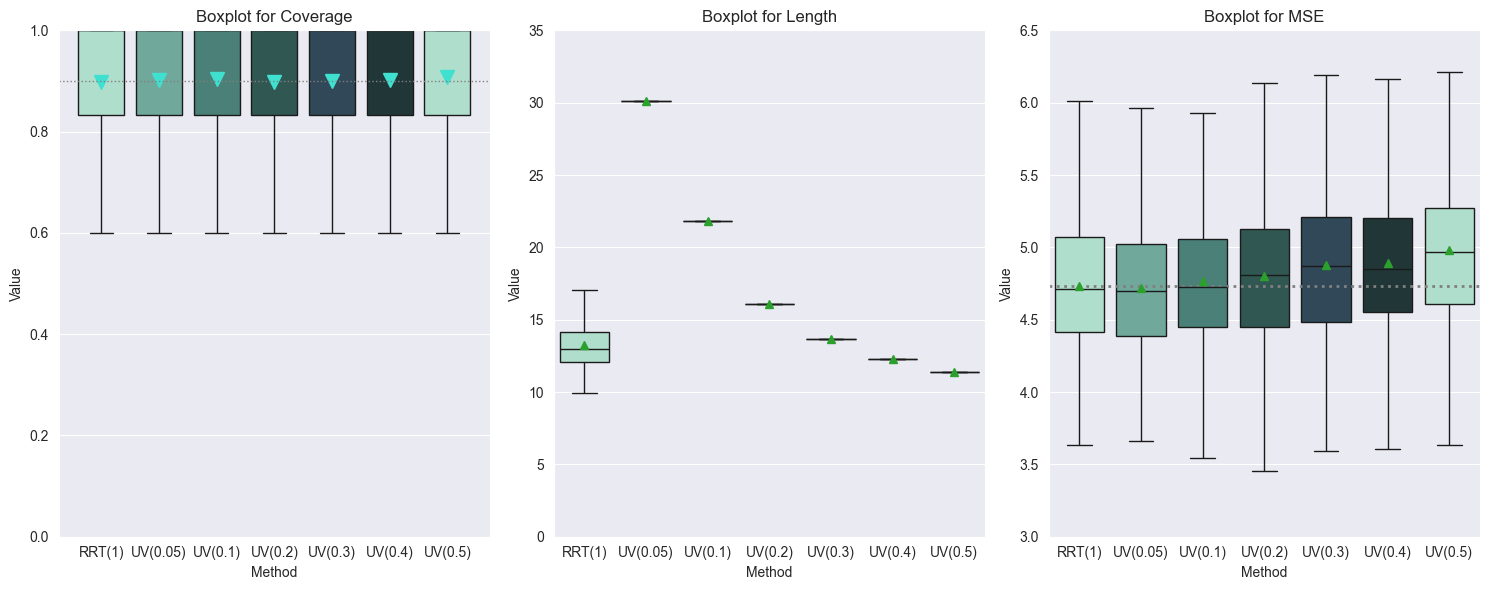

In [18]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=35,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.05)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])